In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [2]:
# Import the datasets

dfHistorical = pd.read_csv('historical-mvps.csv')
dfCurrent = pd.read_csv('current-mvp-ladder.csv')
dfChange = pd.read_csv('predictions-change.csv')

In [3]:
# Preview the historical dataset

dfHistorical.head()

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,0.000,0.765,14.8,0.227,6.8,6.7,NaN,NaN,NaN,NaN
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,0.200,0.787,12.5,0.213,6.5,7.2,NaN,NaN,NaN,NaN
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,0.314,0.852,10.6,0.173,3.1,2.2,NaN,NaN,NaN,NaN
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,0.406,0.836,11.2,0.182,5.4,5.3,NaN,NaN,NaN,NaN
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,0.222,0.830,8.9,0.148,1.5,0.0,NaN,NaN,NaN,NaN


# Create models

In [4]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

xtrain = train[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [5]:
# Create function that gives accuracy scores for each model

def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)

In [6]:
svr = SVR(kernel='rbf', gamma=1e-4, C=100, epsilon = .1)

y_svr = []

scores(y_svr, svr)

Mean squared error: 0.028
R2 score: 0.708
R2 cross validation score: 0.63 (+/- 0.10)


In [7]:
rf = RandomForestRegressor(random_state = 9, n_estimators = 100, criterion = 'mse')

y_rf = []

scores(y_rf, rf)

Mean squared error: 0.035
R2 score: 0.628
R2 cross validation score: 0.50 (+/- 0.17)


In [8]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')

y_knn = []

scores(y_knn, knn)

Mean squared error: 0.035
R2 score: 0.633
R2 cross validation score: 0.53 (+/- 0.15)


In [9]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=987654321,
    activation='identity',
    learning_rate ='invscaling')

y_dnn = []

scores(y_dnn, dnn)

Mean squared error: 0.036
R2 score: 0.619
R2 cross validation score: 0.57 (+/- 0.02)


# Prediction

In [10]:
dfCurrentNames = dfCurrent.iloc[:, 1]
dfCurrentPredict = dfCurrent[['Team Wins', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]

dfCurrent.head()

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
0,1,Giannis (1),24,MIL,76.245614,61.859649,1,33.2,27.2,12.7,...,0.717,15.249123,0.290,8.056140,10.7,53,43,10.6,5.6,57
1,2,Harden (2),29,HOU,77.684211,47.473684,10,37.4,36.6,6.7,...,0.871,15.105263,0.249,10.070175,11.8,54,33,10.5,7.0,57
2,3,PG13 (3),28,OKC,80.561404,53.228070,7,36.3,28.7,8.0,...,0.837,13.954386,0.230,6.185965,6.4,56,37,9.7,4.3,57
3,4,Curry (4),30,GSW,66.175439,58.982456,3,34.3,28.6,5.1,...,0.922,10.501754,0.221,5.035088,6.7,46,41,7.3,3.5,57
4,5,Embiid (5),24,PHI,76.344828,52.310345,8,33.7,27.3,13.5,...,0.811,10.320690,0.192,3.393103,3.3,54,37,7.3,2.4,58


## SVR 

In [11]:
svrPredict = svr.predict(dfCurrentPredict)
svrPredict = svrPredict.tolist()

for (i, j) in zip(dfCurrentNames, svrPredict):
    print(i, j)

Giannis (1) 0.7946478569181021
Harden (2) 0.6249270665034725
PG13 (3) 0.332213971088164
Curry (4) 0.32002827217723784
Embiid (5) 0.16912175890938208
Jokic (6) 0.3528681034974266
KD (7) 0.3853150175880682
LeBron (8) 0.026219654312184204
Kawhi (9) 0.26743984689232825
Kyrie (10) 0.09971455936195461


In [12]:
svrListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, svrPredict)]
svrDataUnsorted = [row[1] for row in svrListUnsorted]
svrList = sorted(svrListUnsorted, key = itemgetter(1), reverse = True)

svrData = [row[1] for row in svrList]
svrNames = [row[0] for row in svrList]
print(svrList)

x_svr = np.arange(len(svrData))

[['Giannis (1)', 0.7946478569181021], ['Harden (2)', 0.6249270665034725], ['KD (7)', 0.3853150175880682], ['Jokic (6)', 0.3528681034974266], ['PG13 (3)', 0.332213971088164], ['Curry (4)', 0.32002827217723784], ['Kawhi (9)', 0.26743984689232825], ['Embiid (5)', 0.16912175890938208], ['Kyrie (10)', 0.09971455936195461], ['LeBron (8)', 0.026219654312184204]]


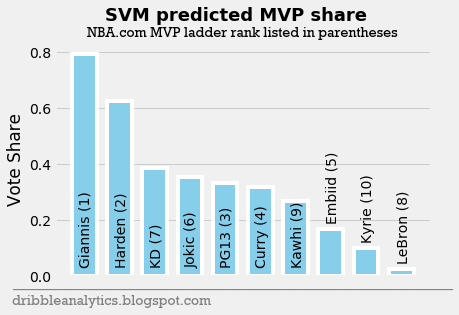

In [13]:
plt.style.use('fivethirtyeight')

svr, ax = plt.subplots()

ax.bar(x_svr, svrData, width = .7, edgecolor = 'white', color = 'skyblue', linewidth = 4, label = 'Predicted')

labels = svrNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <=6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    
svr.suptitle("SVM predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.set_title("NBA.com MVP ladder rank listed in parentheses", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

svr.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

svr.text(x = -0.02, y = -.03,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

svr.savefig('svr.png', dpi = 400, bbox_inches = 'tight')

## RF

In [14]:
rfPredict = rf.predict(dfCurrentPredict)
rfPredict = rfPredict.tolist()

for (i, j) in zip(dfCurrentNames, rfPredict):
    print(i, j)

Giannis (1) 0.68932
Harden (2) 0.4737099999999998
PG13 (3) 0.30304000000000003
Curry (4) 0.27055999999999997
Embiid (5) 0.17699000000000006
Jokic (6) 0.22225999999999993
KD (7) 0.29633000000000004
LeBron (8) 0.13543
Kawhi (9) 0.22459999999999997
Kyrie (10) 0.15317999999999996


In [15]:
rfListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, rfPredict)]
rfDataUnsorted = [row[1] for row in rfListUnsorted]
rfList = sorted(rfListUnsorted, key = itemgetter(1), reverse = True)

rfData = [row[1] for row in rfList]
rfNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfData))

[['Giannis (1)', 0.68932], ['Harden (2)', 0.4737099999999998], ['PG13 (3)', 0.30304000000000003], ['KD (7)', 0.29633000000000004], ['Curry (4)', 0.27055999999999997], ['Kawhi (9)', 0.22459999999999997], ['Jokic (6)', 0.22225999999999993], ['Embiid (5)', 0.17699000000000006], ['Kyrie (10)', 0.15317999999999996], ['LeBron (8)', 0.13543]]


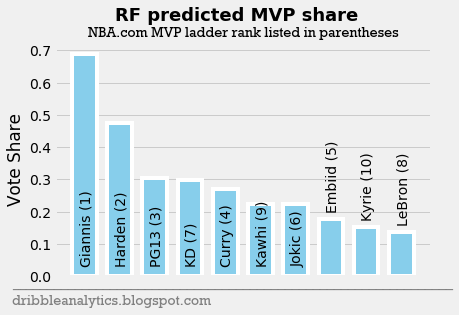

In [16]:
plt.style.use('fivethirtyeight')

rf, ax = plt.subplots()

ax.bar(x_rf, rfData, width = .7, edgecolor = 'white', color = 'skyblue', linewidth = 4, label = 'Predicted')

labels = rfNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf.suptitle("RF predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.set_title("NBA.com MVP ladder rank listed in parentheses", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

rf.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

rf.text(x = -0.02, y = -.03,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

rf.savefig('rf.png', dpi = 400, bbox_inches = 'tight')

## k-NN

In [17]:
knnPredict = knn.predict(dfCurrentPredict)
knnPredict = knnPredict.tolist()

for (i, j) in zip(dfCurrentNames, knnPredict):
    print(i, j)

Giannis (1) 0.7587142857142857
Harden (2) 0.5477142857142858
PG13 (3) 0.29
Curry (4) 0.2422857142857143
Embiid (5) 0.17914285714285713
Jokic (6) 0.37114285714285716
KD (7) 0.24157142857142855
LeBron (8) 0.11557142857142859
Kawhi (9) 0.17514285714285713
Kyrie (10) 0.1455714285714286


In [18]:
knnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, knnPredict)]
knnDataUnsorted = [row[1] for row in knnListUnsorted]
knnList = sorted(knnListUnsorted, key = itemgetter(1), reverse = True)

knnData = [row[1] for row in knnList]
knnNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnData))

[['Giannis (1)', 0.7587142857142857], ['Harden (2)', 0.5477142857142858], ['Jokic (6)', 0.37114285714285716], ['PG13 (3)', 0.29], ['Curry (4)', 0.2422857142857143], ['KD (7)', 0.24157142857142855], ['Embiid (5)', 0.17914285714285713], ['Kawhi (9)', 0.17514285714285713], ['Kyrie (10)', 0.1455714285714286], ['LeBron (8)', 0.11557142857142859]]


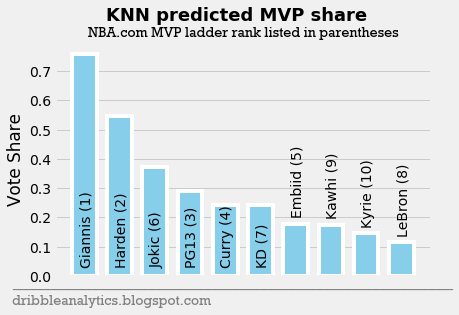

In [19]:
plt.style.use('fivethirtyeight')

knn, ax = plt.subplots()

ax.bar(x_knn, knnData, width = .7, edgecolor = 'white', color = 'skyblue', linewidth = 4, label = 'Predicted')

labels = knnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 5:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 5:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn.suptitle("KNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.set_title("NBA.com MVP ladder rank listed in parentheses", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

knn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

knn.text(x = -0.02, y = -.03,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

knn.savefig('knn.png', dpi = 400, bbox_inches = 'tight')

## DNN

In [20]:
dnnPredict = dnn.predict(dfCurrentPredict)
dnnPredict = dnnPredict.tolist()

for (i, j) in zip(dfCurrentNames, dnnPredict):
    print(i, j)

Giannis (1) 0.6349375629454304
Harden (2) 0.6093129061019475
PG13 (3) 0.4038315102917365
Curry (4) 0.2961515997776998
Embiid (5) 0.2757144123481836
Jokic (6) 0.36597447799168736
KD (7) 0.39546167363912943
LeBron (8) -0.02681578661008753
Kawhi (9) 0.26413961738205605
Kyrie (10) 0.12014655053539137


In [21]:
dnnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, dnnPredict)]
dnnDataUnsorted = [row[1] for row in dnnListUnsorted]
dnnList = sorted(dnnListUnsorted, key = itemgetter(1), reverse = True)

dnnData = [row[1] for row in dnnList]
dnnNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnData))

[['Giannis (1)', 0.6349375629454304], ['Harden (2)', 0.6093129061019475], ['PG13 (3)', 0.4038315102917365], ['KD (7)', 0.39546167363912943], ['Jokic (6)', 0.36597447799168736], ['Curry (4)', 0.2961515997776998], ['Embiid (5)', 0.2757144123481836], ['Kawhi (9)', 0.26413961738205605], ['Kyrie (10)', 0.12014655053539137], ['LeBron (8)', -0.02681578661008753]]


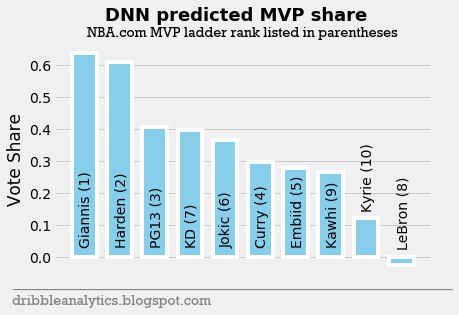

In [22]:
plt.style.use('fivethirtyeight')

dnn, ax = plt.subplots()

ax.bar(x_dnn, dnnData, width = .7, edgecolor = 'white', color = 'skyblue', linewidth = 4, label = 'Predicted')

labels = dnnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 8:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .05, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() > 7:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 7:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn.suptitle("DNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.set_title("NBA.com MVP ladder rank listed in parentheses", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

dnn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

dnn.text(x = -0.02, y = -.03,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

dnn.savefig('dnn.png', dpi = 400, bbox_inches = 'tight')

## Average

In [23]:
avgPredict = []

for (i, j, h, k) in zip(svrDataUnsorted, rfDataUnsorted, knnDataUnsorted, dnnDataUnsorted):
    avgPredict.append((i + j + h + k) / 4)

avgList = [[i, j] for i, j in zip(dfCurrentNames, avgPredict)]
avgList = sorted(avgList, key = itemgetter(1), reverse = True)

avgData = [row[1] for row in avgList]
avgNames = [row[0] for row in avgList]
print(avgList)

x_avg = np.arange(len(avgData))

[['Giannis (1)', 0.7194049263944546], ['Harden (2)', 0.5639160645799264], ['PG13 (3)', 0.3322713703449751], ['KD (7)', 0.32966952994965654], ['Jokic (6)', 0.32806135965799277], ['Curry (4)', 0.282256396560163], ['Kawhi (9)', 0.23283058035431034], ['Embiid (5)', 0.20024225710010574], ['Kyrie (10)', 0.12965313461719363], ['LeBron (8)', 0.06260132406838131]]


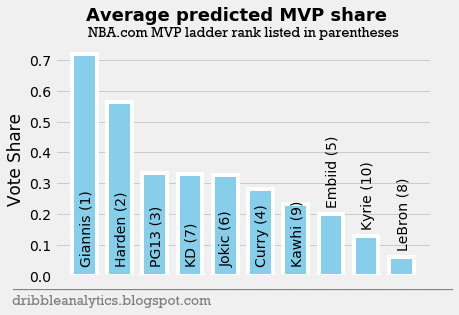

In [24]:
plt.style.use('fivethirtyeight')

avg, ax = plt.subplots()

ax.bar(x_avg, avgData, width = .7, edgecolor = 'white', color = 'skyblue', linewidth = 4, label = 'Predicted')

labels = avgNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg.suptitle("Average predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.set_title("NBA.com MVP ladder rank listed in parentheses", size = 14, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

avg.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

avg.text(x = -0.02, y = -.03,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

avg.savefig('avg.png', dpi = 400, bbox_inches = 'tight')

# Change in predictions

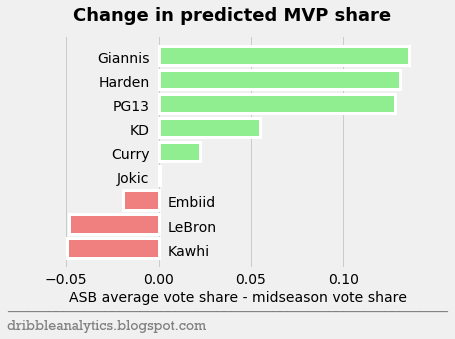

In [25]:
plt.style.use('fivethirtyeight')
change, ax = plt.subplots()

y_pos = np.arange(len(dfChange['Difference']))

colorList = []

for i in dfChange['Difference'].sort_values(ascending = True):
    if i < 0:
        colorList.append('lightcoral')
    elif i > 0:
        colorList.append('lightgreen')

ax.barh(y_pos, dfChange['Difference'].sort_values(ascending = True), color = colorList, edgecolor = 'white', linewidth = 3)

labels = [i for i in dfChange['Player']]
labels = reversed(labels)

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_y()
    if rect.get_y() < 2:
        ax.text(rect.get_x() + .005, height, label,
        ha='left', va='bottom', color = 'black')
    elif rect.get_y() >= 2:
        ax.text(rect.get_x() - .005, height, label,
        ha='right', va='bottom', color = 'black')

change.suptitle("Change in predicted MVP share", weight = 'bold', size = 18)
ax.yaxis.set_visible(False)
ax.set_xlabel("ASB average vote share - midseason vote share", size = 14)

change.text(x = -0.02, y = -0.07,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

change.text(x = -0.02, y = -.14,
    s = 'dribbleanalytics.blogspot.com                     ',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')
 
change.savefig('change.png', dpi = 400, bbox_inches = 'tight')